In [2]:
import cv2
from matplotlib import pyplot
import numpy

# Ustawienie rozmarów wyświetlanych obrazów
pyplot.rcParams["figure.figsize"] = (18, 10)

In [4]:
#
# Wczytanie obrazów źródłowych
#
# źródło grafiki colors.jpg: https://unsplash.com/photos/gT5kuls6Y6Q
# źródło grafiki gacław-na-kuchni.jpg: własne
#
image_from_file = cv2.imread('images/colors.jpg')
#image_from_file = cv2.imread('images/gacław-na-kuchni.jpg')
image_gray = cv2.cvtColor(image_from_file, cv2.COLOR_BGR2GRAY)
image_color = cv2.cvtColor(image_from_file, cv2.COLOR_BGR2RGB)
print('Rozmiar obrazka: ', image_from_file.shape)

Rozmiar obrazka:  (750, 1000, 3)


# Zadanie 1

In [6]:
output = numpy.copy(image_gray)


def find_closest_palette_color(value, k=2):
    return round((k - 1) * value / 255) * 255 / (k - 1)


def add_and_clip(a, b):
    a = int(a)
    summ = a + b
    if summ < 0:
        summ = 0
    elif summ > 255:
        summ = 255
    return summ


#
# Algorytm
#
for y in range(output.shape[0]):
    for x in range(output.shape[1]):
        old_pixel = output[y][x]
        new_pixel = find_closest_palette_color(old_pixel)
        output[y][x] = new_pixel
        quant_error = old_pixel - new_pixel
        if x + 1 < output.shape[1]:
            output[y][x + 1] = add_and_clip(output[y][x + 1], quant_error * 7 / 16)
        if y + 1 < output.shape[0]:
            if x - 1 >= 0:
                output[y + 1][x - 1] = add_and_clip(output[y + 1][x - 1], quant_error * 3 / 16)
            output[y + 1][x] = add_and_clip(output[y + 1][x], quant_error * 5 / 16)
            if x + 1 < output.shape[0]:
                output[y + 1][x + 1] = add_and_clip(output[y + 1][x + 1], quant_error * 1 / 16)

#
# Wyświetlenie
#
pyplot.imshow(output, cmap='gray')

KeyboardInterrupt: 

Text(0, 0.5, 'Liczba pikseli obrazu []')

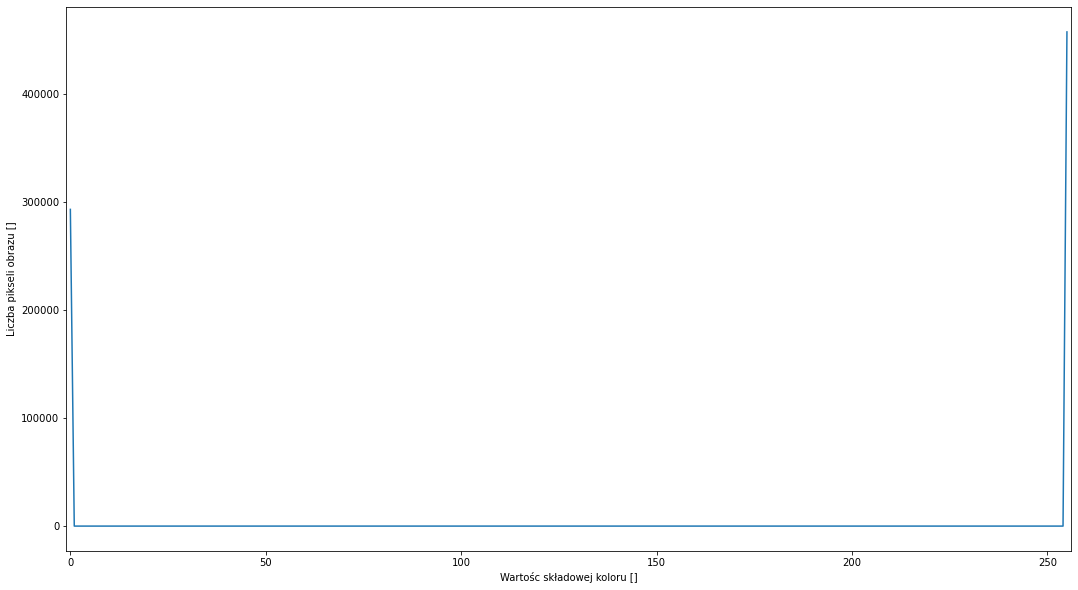

In [5]:
#
# Histogram
#
histr = cv2.calcHist([output], [0], None, [256], [0, 256])
pyplot.plot(histr)
pyplot.xlim([-1, 256])
pyplot.xlabel('Wartośc składowej koloru []')
pyplot.ylabel('Liczba pikseli obrazu []')

# Zadanie 2

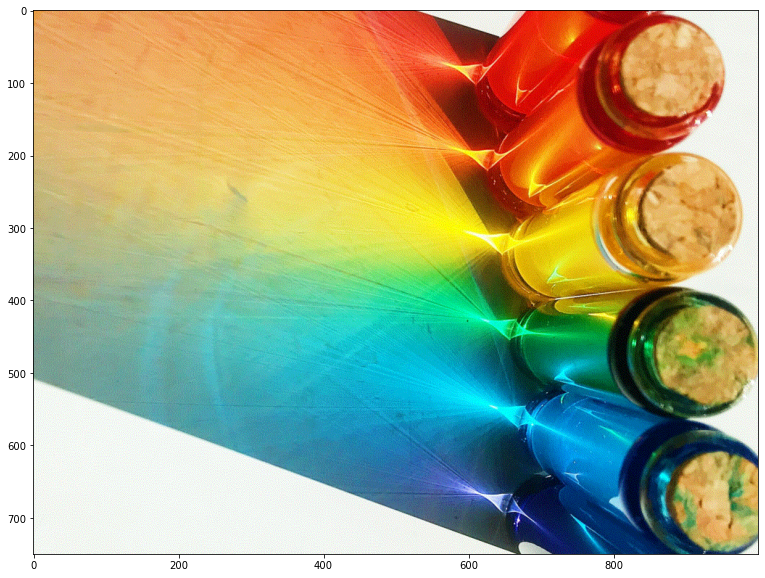

In [9]:
output = numpy.copy(image_color)

k=8

#
# Algorytm
#
for y in range(output.shape[0]):
    for x in range(output.shape[1]):
        old_pixel_r = output[y][x][0]
        old_pixel_g = output[y][x][1]
        old_pixel_b = output[y][x][2]
        new_pixel_r = find_closest_palette_color(old_pixel_r, k=k)
        new_pixel_g = find_closest_palette_color(old_pixel_g, k=k)
        new_pixel_b = find_closest_palette_color(old_pixel_b, k=k)
        output[y][x][0] = new_pixel_r
        output[y][x][1] = new_pixel_g
        output[y][x][2] = new_pixel_b
        quant_error_r = old_pixel_r - new_pixel_r
        quant_error_g = old_pixel_g - new_pixel_g
        quant_error_b = old_pixel_b - new_pixel_b
        if x + 1 < output.shape[1]:
            output[y][x + 1][0] = add_and_clip(output[y][x + 1][0], quant_error_r * 7 / 16)
            output[y][x + 1][1] = add_and_clip(output[y][x + 1][1], quant_error_g * 7 / 16)
            output[y][x + 1][2] = add_and_clip(output[y][x + 1][2], quant_error_b * 7 / 16)
        if y + 1 < output.shape[0]:
            if x - 1 >= 0:
                output[y + 1][x - 1][0] = add_and_clip(output[y + 1][x - 1][0], quant_error_r * 3 / 16)
                output[y + 1][x - 1][1] = add_and_clip(output[y + 1][x - 1][1], quant_error_g * 3 / 16)
                output[y + 1][x - 1][2] = add_and_clip(output[y + 1][x - 1][2], quant_error_b * 3 / 16)
            output[y + 1][x][0] = add_and_clip(output[y + 1][x][0], quant_error_r * 5 / 16)
            output[y + 1][x][1] = add_and_clip(output[y + 1][x][1], quant_error_g * 5 / 16)
            output[y + 1][x][2] = add_and_clip(output[y + 1][x][2], quant_error_b * 5 / 16)
            if x + 1 < output.shape[0]:
                output[y + 1][x + 1][0] = add_and_clip(output[y + 1][x + 1][0], quant_error_r * 1 / 16)
                output[y + 1][x + 1][1] = add_and_clip(output[y + 1][x + 1][1], quant_error_g * 1 / 16)
                output[y + 1][x + 1][2] = add_and_clip(output[y + 1][x + 1][2], quant_error_b * 1 / 16)

#
# Wyświetlenie
#
pyplot.imshow(output)

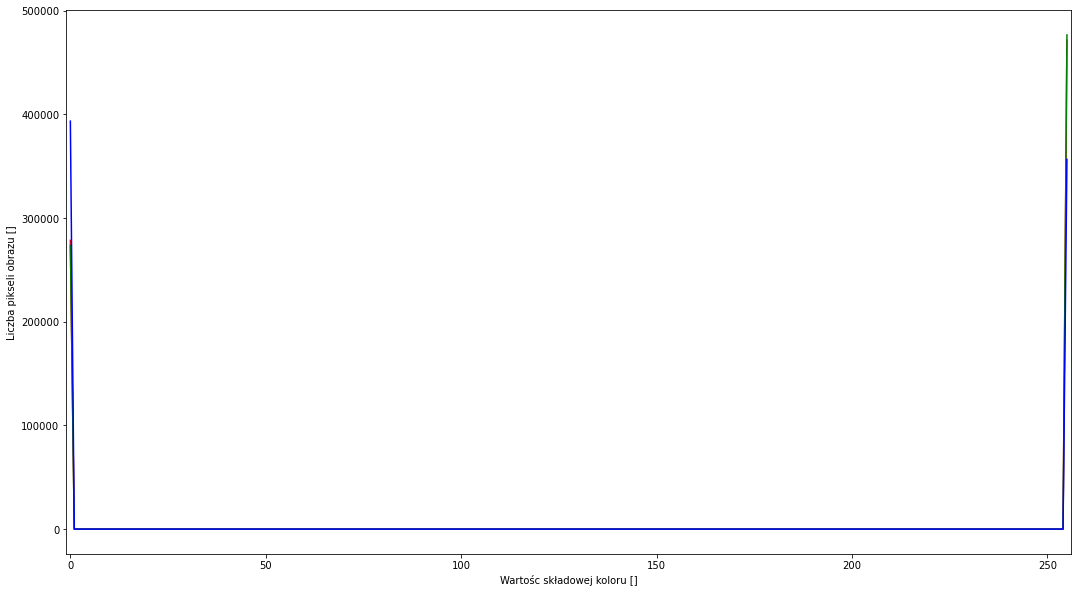

In [8]:
#
# Histogram
#
color = ('r', 'g', 'b')

for i, col in enumerate(color):
    histr = cv2.calcHist([output], [i], None, [256], [0, 256])
    pyplot.plot(histr, color=col)
    pyplot.xlim([-1, 256])
    pyplot.xlabel('Wartośc składowej koloru []')
    pyplot.ylabel('Liczba pikseli obrazu []')

# Zadanie 3

In [ ]:
#
# Przygotowanie płótna
#
width = 80
height = 60
image = numpy.zeros((height, width, 3), dtype=numpy.uint8)


#
# Funkcja rysująca punkt
#
# NOTE(sdatko): punkt 0,0 to lewy dolny róg obrazu
#
def draw_point(image, x, y, color=(255, 255, 255)):
    image[image.shape[0] - 1 - y, x, :] = color


#
# Funkcja rysująca linię
#
def draw_line(image, x1, y1, x2, y2):
    pass  # TODO: implement


#
# Funkcja rysująca trójkąt
#
def draw_triangle(image, a, b, c):
    pass  # TODO: implement


#
# Rysowanie
#
pass  # TODO: implement

#
# Wyświetlenie
#
pyplot.imshow(image)

# Zadanie 4

In [ ]:
#
# Przygotowanie płótna
#
width = 80
height = 60
image = numpy.zeros((height, width, 3), dtype=numpy.uint8)


#
# Funkcja rysująca punkt
#
# NOTE(sdatko): punkt 0,0 to lewy dolny róg obrazu
#
def draw_point(image, x, y, color=(255, 255, 255)):
    image[image.shape[0] - 1 - y, x, :] = color


#
# Funkcja rysująca linię
#
def draw_line(image, x1, y1, x2, y2):
    pass  # TODO: implement


#
# Funkcja rysująca trójkąt
#
def draw_triangle(image, a, b, c):
    pass  # TODO: implement


#
# Rysowanie
#
pass  # TODO: implement

#
# Wyświetlenie
#
pyplot.imshow(image)

# Zadanie 5

In [ ]:
#
# Przygotowanie płótna
#
width = 80
height = 60
image = numpy.zeros((height, width, 3), dtype=numpy.uint8)


#
# Funkcja rysująca punkt
#
# NOTE(sdatko): punkt 0,0 to lewy dolny róg obrazu
#
def draw_point(image, x, y, color=(255, 255, 255)):
    image[image.shape[0] - 1 - y, x, :] = color


#
# Funkcja rysująca linię
#
def draw_line(image, x1, y1, x2, y2):
    pass  # TODO: implement


#
# Funkcja rysująca trójkąt
#
def draw_triangle(image, a, b, c):
    pass  # TODO: implement


#
# Rysowanie
#
pass  # TODO: implement

#
# Wyświetlenie
#
pyplot.imshow(image)